In [1]:
import pandas as pd 
import tensorflow as tf
from tensorflow import keras

c:\Users\vedan\Desktop\sample_project_1\env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('Gold.csv')

In [3]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,1648.3,186519.0,1667.2,1670.9,1640.7
1,10/27/2022,1668.8,180599.0,1668.8,1674.8,1658.5
2,10/26/2022,1669.2,183453.0,1657.7,1679.4,1653.8
3,10/25/2022,1658.0,178706.0,1654.5,1666.8,1641.2
4,10/24/2022,1654.1,167448.0,1662.9,1675.5,1648.0


<AxesSubplot:>

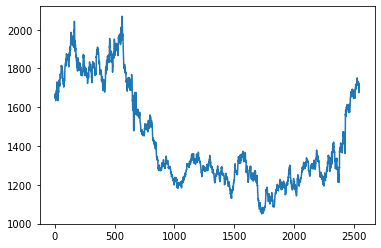

In [4]:
df['Close/Last'].plot()

In [5]:
import matplotlib.pyplot as plt

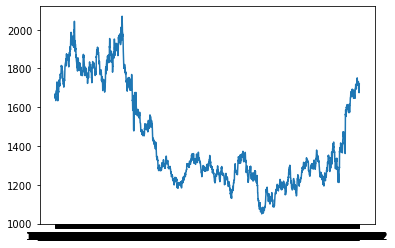

In [6]:
plt.plot(df['Date'],df['Close/Last'])

In [7]:
close = df['Close/Last'].tolist()

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close/Last'].values.reshape(-1, 1))

In [10]:
train_data = scaled_data[:int(0.8 * len(df))]
test_data = scaled_data[int(0.8 * len(df)):]

In [11]:
import numpy as np

In [12]:
def create_sequences(dataset, sequence_length):
    X = []
    y = []
    for i in range(len(dataset) - sequence_length):
        X.append(dataset[i:i + sequence_length, 0])
        y.append(dataset[i + sequence_length, 0])
    return np.array(X), np.array(y)

In [13]:
sequence_length = 10 
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [15]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
127/127 [==============================] - 21s 34ms/step - loss: 0.0068
Epoch 2/10
127/127 [==============================] - 4s 33ms/step - loss: 7.9997e-04
Epoch 3/10
127/127 [==============================] - 4s 34ms/step - loss: 7.5236e-04
Epoch 4/10
127/127 [==============================] - 5s 42ms/step - loss: 8.2967e-04
Epoch 5/10
127/127 [==============================] - 7s 58ms/step - loss: 7.2162e-04
Epoch 6/10
127/127 [==============================] - 4s 35ms/step - loss: 7.8613e-04
Epoch 7/10
127/127 [==============================] - 4s 32ms/step - loss: 6.5845e-04
Epoch 8/10
127/127 [==============================] - 4s 34ms/step - loss: 6.5867e-04
Epoch 9/10
127/127 [==============================] - 4s 35ms/step - loss: 6.2644e-04
Epoch 10/10
127/127 [==============================] - 5s 40ms/step - loss: 6.2736e-04


In [18]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
print('Train Loss:', train_loss)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', test_loss)

Train Loss: 0.0005601991433650255
Test Loss: 0.0006203374941833317


In [19]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse scale the predicted values
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

16/16 [==============================] - 0s 12ms/step


In [20]:
from sklearn.metrics import r2_score

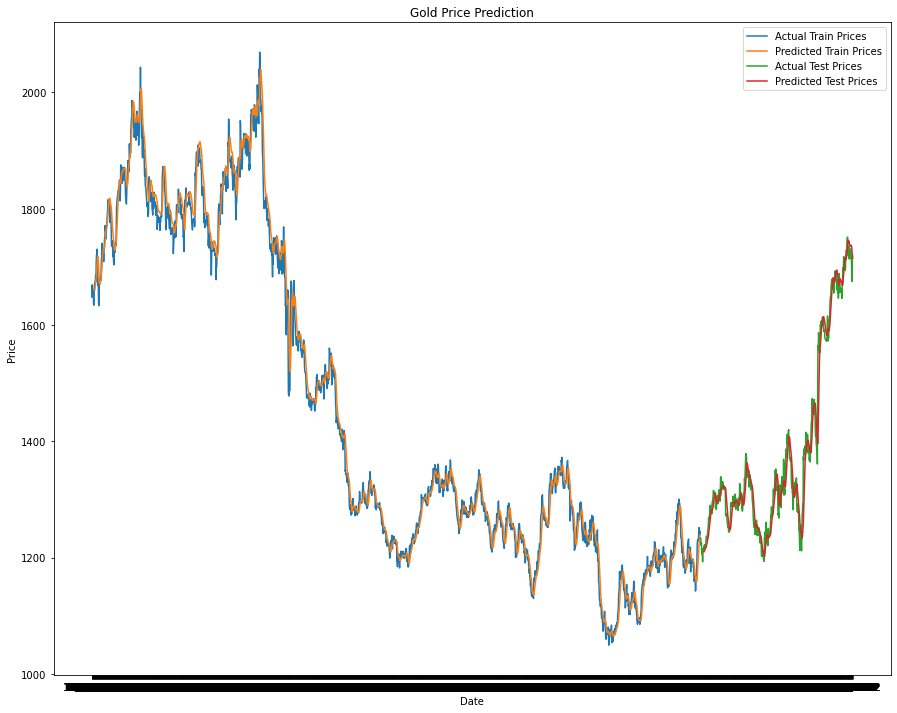

In [21]:
# Plot the predicted values
import matplotlib.pyplot as plt

train_data = df.iloc[:int(0.8 * len(df)), :]
test_data = df.iloc[int(0.8 * len(df)):, :]
plt.figure(figsize = (15,12))
plt.plot(train_data['Date'], train_data['Close/Last'], label='Actual Train Prices')
plt.plot(train_data['Date'][sequence_length:], train_predictions, label='Predicted Train Prices')
plt.plot(test_data['Date'], test_data['Close/Last'], label='Actual Test Prices')
plt.plot(test_data['Date'][sequence_length:], test_predictions, label='Predicted Test Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Price Prediction')
plt.legend()
plt.show()

In [44]:
r2_score(test_data['Close/Last'][sequence_length:],test_predictions)

0.9741942389707089

In [45]:
from sklearn.metrics import mean_squared_error

In [47]:
rmse = np.sqrt(mean_squared_error(test_data['Close/Last'][sequence_length:],test_predictions))

In [51]:
rmse

25.399720750159712